<a href="https://colab.research.google.com/github/tphlabs/python_workshop/blob/main/Chi_Sqaured_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Chi Squared  test for distribution

v.0.1.0 Evgeny Kolonsky

Reference:

John R. Taylor. *An Introduction to Error Analysis: The Study of Uncertainties in Physical Measurements.* University Science Books, 1996. ISBN 093570275X.

See **Chapter 12 "The Chi-squared test for distribution"**

In [139]:
import numpy as np
from scipy.stats import chi2, poisson, norm
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Introduction

(cited from [Taylor])

## General form

$$
\chi^2 = \sum_{\text{bins}}^n
\left(
    \frac{\text{observed value} - \text{expected value}}{\text{standard deviation}}
\right)^2    
$$
$\chi^2$ is an indicator of the agreement between the observed and expected valued of some variable. If agreement is good, $\chi^2$ will be in order of $n$; if it is poor, $\chi^2$ will be much greater that $n$. Here $n$ - number of bins. Each bin contain several measured values.

## Dicrete case

Random value $x_i$ is dicrete, such as events counter.



$$
\chi^2 = \sum_{k=1}^n
    \frac{(O_k - E_k)^2}{E_k}
$$
where $O_k$ observed number of events falling to bin $k$, $E_k$ - expected number of events belonging to bin $k$.

## Continuous case

Two variables are measured, $x$ and $y$, where $y$ is expected to be some definite function of $x$:
$$
y = f(x)
$$
(such as $y = a x^2$).

Suppose we have $N$ measured pairs $(x_i, y_i)$, where $x_i$ have negligible uncertainty and the $y_i$ have known uncertainties $\sigma_i$. Here, the expected value of $y_i$ is $f(x_i)$, and we could test how well $y$ fits the function $f(x)$ by calculating
$$
\chi^2 = \sum_1^N
\left(
  \frac{y_i - f(x_i)}{\sigma_i}
\right)^2  
$$

## Degrees of Freedom and Reduced Chi Squared

Number of degrees of freedom
$$d = n-c$$ is always less the number of bins $n$ by number of constraints $c$. When $n$ is big enough, $d \approx n$.

Reduced chi sqaured (or *chi squared per degree of freedom*) is
$$
\tilde \chi^2 = \chi^2 / d.
$$
Because the expected value of $\chi^2$ is $d$, we see that
$$
\text{(expected average value of $\tilde \chi^2$ )} = 1.
$$

Oure test can be stated as follows:
if we obtaing a value of $\tilde \chi^2$ of order one or less, then we have no reason to doubt our expected distribution; if we obtain value of $\tilde \chi^2$ much larger that one, our expected distribution is unlikely to be correct.

## Probabilities of Chi Sqaured

After completing any series of measuremens, we calculate reduced chi sqaured, which w denore $\tilde \chi^2_o$ (where subscript $o$ stands for *observed*, because the value $\tilde \chi^2_o$ is actally observed). Next, assuming our measurements do follow the expected distribution, we compute the probability
$$
Prob(\tilde \chi^2 > \tilde \chi^2_o)
$$
of finding a value $\tilde \chi^2$ greater than or equal to the observed value $\tilde \chi^2_o$.  If this probability is high, our value is perfectly acceptable, and we have no reason to reject our expected distribution. If this probability is unreasinably low, a value of $\tilde \chi^2$ as large as our observed $\tilde \chi^2_o$ is very unlikely (id our dmeasurements were distributed as expected), and our expected distribution is correspndingly unlikely to be correct.

With the boundary at 5%, we would say that our observed value $\tilde \chi^2_o$ indicates significant *disagreement* if
$$
Prob(\tilde \chi^2 > \tilde \chi^2_o) < 5\%.
$$


# Example 1 - Poisson distribution test
(cited from table 12.9 of the Taylor book)

In [120]:
measurements = '''
# counts observations
0 7
1 17
2 29
3 20
4 16
5 8
6 1
7 2
# 8 and more
8 0
'''
counts, observations = np.genfromtxt(measurements.splitlines(), skip_header=1, dtype=int).T

# number of bins
n = 6
bins = range(n)
N = observations.sum()
print(f'Total number of observations N= {N:.0f}')
mu = np.sum(counts * observations) / N
print(f'Average counts value {mu=:.2f}')

# pack  observations to bins
observed = [observations[i] for i in range(n-1)] + [observations[n-1:].sum()]
observed = np.array(observed)

p = poisson(mu)
expected = p.pmf(bins) * N
expected[-1] =  N - expected[:-1].sum()
for k in range(n):
  print(f'Bin {k}     observed {observed[k]:>5.0f}    expected {expected[k]:>5.1f}')

Total number of observations N 100
Average counts value mu=2.59
Bin 0     observed     7    expected   7.5
Bin 1     observed    17    expected  19.4
Bin 2     observed    29    expected  25.2
Bin 3     observed    20    expected  21.7
Bin 4     observed    16    expected  14.1
Bin 5     observed    11    expected  12.1


In [119]:
  chi2_observed = np.sum((observed - expected)**2 / expected)
  DOF = n - 2 # degrees of freedom (two constraints - one for number of bins, other for calculating mu)
  print(f'Reduced Chi-squared test statistic {chi2_observed/DOF:.2f}')
  print(f'Degrees of freedom {DOF=}')
  p_value = chi2.sf(chi2_observed, DOF)
  print(f'Chi-squared test statistic:{chi2_observed:.2f}')
  print(f'Probability that for given expected distribution chi2 greater than chi2_observed\n (p-value): {p_value*100:.0f}%')

Reduced Chi-squared test statistic 0.36
Degrees of freedom DOF=4
Chi-squared test statistic:1.43
Probability that for given expected distribution chi2 greater than chi2_observed
 (p-value): 84%


Reduced chi-squared observed $\tilde \chi^2_o=0.36$ is less than one, therefore measurements are likely to be from Poisson distribution.

# Example 2 - Parabola test

(cited from Electron in fields experiment)

In [76]:
chi2_observed / DOF

np.float64(1.2476864854339753)

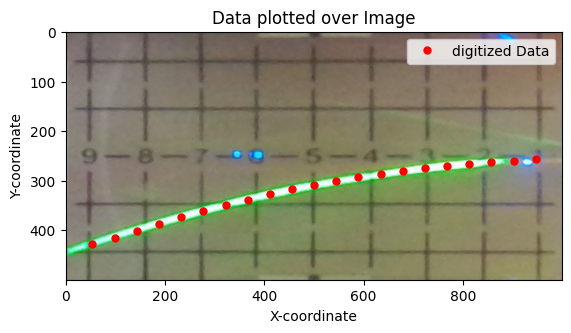

In [137]:
# prompt: get image from url and plot data over it

from skimage import io
import matplotlib.pyplot as plt

# URL of the image
image_url = 'https://github.com/tphlabs/data/blob/21c585f0f7bb13ff9063ba2728d934fd86560266/Lab2_EF/CollectData/083%20Ua%204.0%20Up%20-2.5%20I%200.000.png?raw=true'
data = '''
# x, y
	9.018	-1.856
	8.616	-1.71
	8.213	-1.566
	7.811	-1.425
	7.409	-1.289
	7.007	-1.158
	6.604	-1.034
	6.202	-0.917
	5.8	-0.806
	5.398	-0.701
	4.996	-0.606
	4.593	-0.52
	4.191	-0.444
	3.789	-0.376
	3.387	-0.315
	2.984	-0.261
	2.582	-0.214
	2.18	-0.171
	1.778	-0.132
	1.376	-0.096
	0.973	-0.063
'''
x, y = np.genfromtxt(data.splitlines(), skip_header=1, dtype=float).T

# Read the image from the URL
image = io.imread(image_url)

# Display the image
plt.imshow(image)

xright, xleft = 0.5, 9.5
ytop, ybottom = -2.6, 2.6
x_coord = 1000 - (xright - x) / (xright - xleft) * 1000
y_coord = (y - ybottom) / (ytop - ybottom)*500

# Plot the data over the image
plt.plot(x_coord, y_coord, 'ro', markersize=5, label='Digitized Data')

# Add labels and title
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.title('Data plotted over Image')
plt.legend()

# Show the plot
plt.show()


Reduced Chi-squared test statistic 0.56


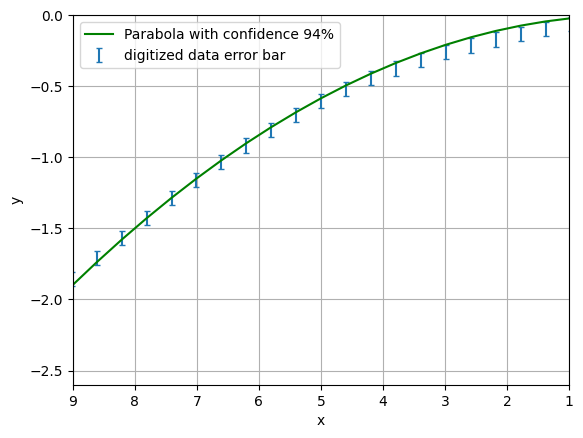

In [163]:
data = '''
# x/cm, y/cm
	9.018	-1.856
	8.616	-1.71
	8.213	-1.566
	7.811	-1.425
	7.409	-1.289
	7.007	-1.158
	6.604	-1.034
	6.202	-0.917
	5.8	-0.806
	5.398	-0.701
	4.996	-0.606
	4.593	-0.52
	4.191	-0.444
	3.789	-0.376
	3.387	-0.315
	2.984	-0.261
	2.582	-0.214
	2.18	-0.171
	1.778	-0.132
	1.376	-0.096
	0.973	-0.063
'''
x, y = np.genfromtxt(data.splitlines(), skip_header=1, dtype=float).T

sigma = 0.5e-1 # sigma_y error 0.5 mm


def parabola(x, a):
  return a*x**2

popt, _ = curve_fit(parabola, x, y)

y_expected = parabola(x, *popt)


chi2_observed = np.sum((y - y_expected)**2 / sigma**2)
DOF = x.size - 1 # degrees of freedom
p_value = chi2.sf(chi2_observed, DOF)

print(f'Reduced Chi-squared test statistic {chi2_observed/DOF:.2f}')
plt.errorbar(x, y, sigma, capsize=2, fmt='none', label='digitized data error bar')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.plot(x, y_expected, color='green', label=f'Parabola with confidence {p_value*100:.0f}%')
plt.legend()
plt.ylim(-2.6, 0)
plt.xlim(9, 1)
plt.show()